# Home Assignment No. 3

To solve this task, you will write a lot of code to try several machine learning methods for classification and regression.
* You are **HIGHLY RECOMMENDED** to read relevant documentation, e.g. for [python](https://docs.python.org/3/), [numpy](https://docs.scipy.org/doc/numpy/reference/), [matlpotlib](https://matplotlib.org/) and [sklearn](https://scikit-learn.org/stable/). Also remember that seminars, lecture slides, [Google](http://google.com) and [StackOverflow](https://stackoverflow.com/) are your close friends during this course (and, probably, whole life?).

* If you want an easy life, you have to use **BUILT-IN METHODS** of `sklearn` library instead of writing tons of your own code. There exists a class/method for almost everything you can imagine (related to this homework).

* You have to write **CODE** directly inside specified places marked by comments: **BEGIN/END Solution**. Do not create new cells.

* In some problems you are asked to provide a short discussion of the results. For that find the specific place marked via **Your text answer: \<write your answer\>**.

* For every separate problem or subproblem (if specified) you can get only 0 points or maximal points for this problem. There are **NO INTERMEDIATE scores**. So make sure that you did everything required in the task.

* Your **SOLUTION** notebook **MUST BE REPRODUCIBLE**, i.e., if the reviewer decides to restart the notebook and run all cells, after all the computation he will obtain exactly the same solution (with all the corresponding plots) as in your uploaded notebook. For this purpose, we suggest fixing random `seed` or (better) define `random_state=` inside every algorithm that uses some pseudorandomness.

* Your code must be clear to the reviewer. For this purpose, try to include necessary comments inside the code. But remember: **GOOD CODE MUST BE SELF-EXPLANATORY** without any additional comments.

* Many `sklearn` algorithms support multithreading (Ensemble Methods, Cross-Validation, etc.). Check if the particular algorithm has `n_jobs` parameters and set it to `-1` to use all the cores.


In [1]:
# Your imports

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import GPy
from GPy.models import GPRegression
from sklearn.metrics import r2_score
from sklearn.decomposition import PCA

## Task 1 - Gaussian Processes (1 pt.)

In the following exercise, you will need to fit the gaussian process with different kernels on the ```elecricity_consumption_FR.csv``` time series data. We have already loaded and prepared the train/test datasets for you below.

Use [**GPy**](https://pypi.python.org/pypi/GPy) library for training and prediction. Fit a GP and run the predict on the test. Useful kernels to combine: `GPy.kern.RBF, GPy.kern.Poly, GPy.kern.StdPeriodic, GPy.kern.White, GPy.kern.Linear`.

**The task**:
* Normalize the target value by fitting a transformation on the train (use ```sklearn.preprocessing.StandardScaler```)
* Plot the resulting target against the time index.
* Plot mean and confidence interval of the prediction.
* Inspect them on normality by scatter plot: plot predicted points/time series against true values.
* Estimate the prediction error with `r2_score`. R2-score accepted > 0.7 on test sample.

In [2]:
#! pip install GPy==1.13.1

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt

In [4]:
data = pd.read_csv('elecricity_consumption_FR.csv')

In [5]:
data.dropna(inplace=True)

In [6]:
y = np.array(data.values)
X = np.array(data.index)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False, test_size=0.3)
X_train = X_train.reshape(-1,1)
X_test = X_test.reshape(-1,1)


Normalize the target value by fitting a transformation on the train (use sklearn.preprocessing.StandardScaler)

In [8]:
### BEGIN SOLUTION (do not delete this comment!)
scaler = StandardScaler()
scaler.fit(y_train)
y_train_scaled = scaler.transform(y_train)
y_test_scaled = scaler.transform(y_test)
### END SOLUTION (do not delete this comment!)

Plot the resulting target against the time index.

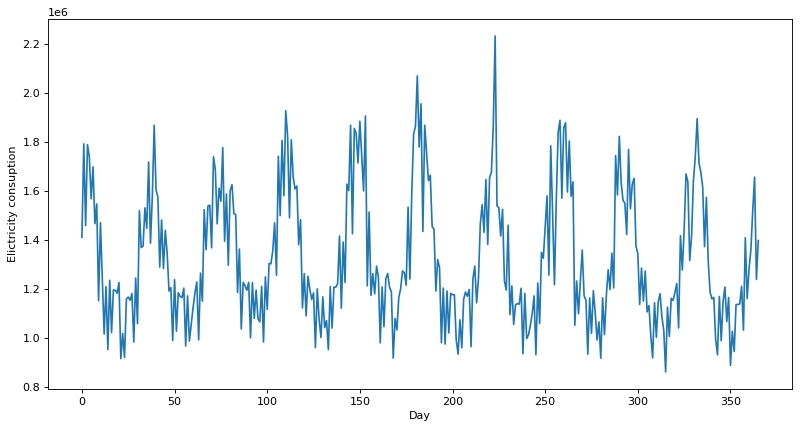

In [9]:
### BEGIN SOLUTION (do not delete this comment!)
stacked = np.vstack((y_train, y_test))
plt.figure(figsize=(12, 6), dpi=80)
plt.plot(stacked)
plt.xlabel("Day")
plt.ylabel("Elictricity consuption")
plt.show()
### END SOLUTION (do not delete this comment!)

Plot mean and confidence interval of the prediction. Try to use kernels to obtain the expected result.

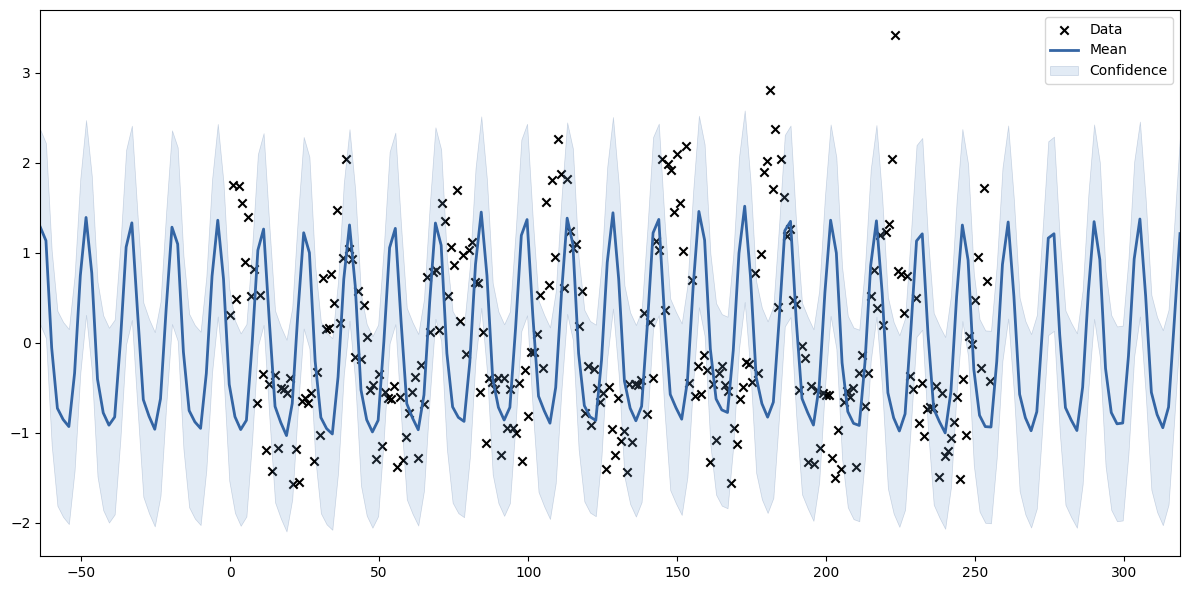

In [10]:
### BEGIN SOLUTION (do not delete this comment!)

# Defining the kernels:
rbf = GPy.kern.RBF(input_dim=1, lengthscale=20)
period = GPy.kern.StdPeriodic(input_dim=1)

# Initializing a model and fitting the model:
model = GPy.models.GPRegression(X_train, y_train_scaled, rbf+period)
model.optimize()

# Plotting:
model.plot(figsize=(12, 6), dpi=80)
plt.show()

### END SOLUTION (do not delete this comment!))

Inspect them on normality by scatter plot: plot predicted points/time series against true values.

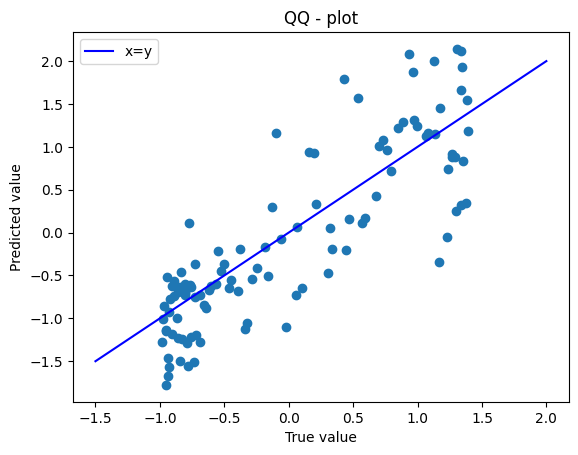

In [11]:
### BEGIN SOLUTION (do not delete this comment!)

# Seed fixation:
np.random.seed(23)

# Predicting the values and picking the 0 column due to the specific of the returned data: 0 is 'mean' and 1 is 'var':
y_pred = model.predict(X_test)[0]

# Drawing a scatter plot:
plt.scatter(y_pred, y_test_scaled)

# Drawing a linear function x=y:
x_1, y_1 = [-1.5, 2.0], [-1.5, 2.0]
plt.plot(x_1, y_1, color="blue", label="x=y")

# Adjusting the plotting parameters: 
plt.xlabel("True value")
plt.ylabel("Predicted value")
plt.title("QQ - plot")
plt.legend()
plt.show()

### END SOLUTION (do not delete this comment!)

Estimate the prediction error with r2_score. R2-score accepted > 0.7 on test sample.

In [12]:
### BEGIN SOLUTION (do not delete this comment!)
print(r2_score(y_test_scaled, y_pred).round(2))
### END SOLUTION (do not delete this comment!)

0.72


## Task 2 - MNIST, kMNIST component analysis and manifold learning. (5 pts.)

### Task 2.1. (1 pt)

Download `MNIST` dataset. Here we will estimate the data intrinsic dimensionality, decompose the dataset on principle components and estimate the cumulative explained variance by each component.

You can either use the [proposed method](https://www.stat.berkeley.edu/~bickel/mldim.pdf) for the estimation of sample intrinsic dimension or any other method (convenient for you). For the first case, yoyu may use the code from [here](https://gist.github.com/mehdidc/8a0bb21a31c43b0cbbdd31d75929b5e4)

1. Estimate the intrinsic dimensionality of the dataset. Provide the plot.
2. Decompose the data on principal components (PCA). Plot the cumulative explained variance by each component. Plot the example of back-decomposition with **6** different set of components and corresponding explained variance. You can choose any digit from the dataset.

In [13]:
from sklearn import datasets
from sklearn.preprocessing import StandardScaler

dg = datasets.load_digits()

scaler = StandardScaler().fit(dg.data)
data = scaler.transform(dg.data)

1) Estimate the intrinsic dimentionality of the dataset. Provide the plot.

100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:27<00:00,  1.40s/it]


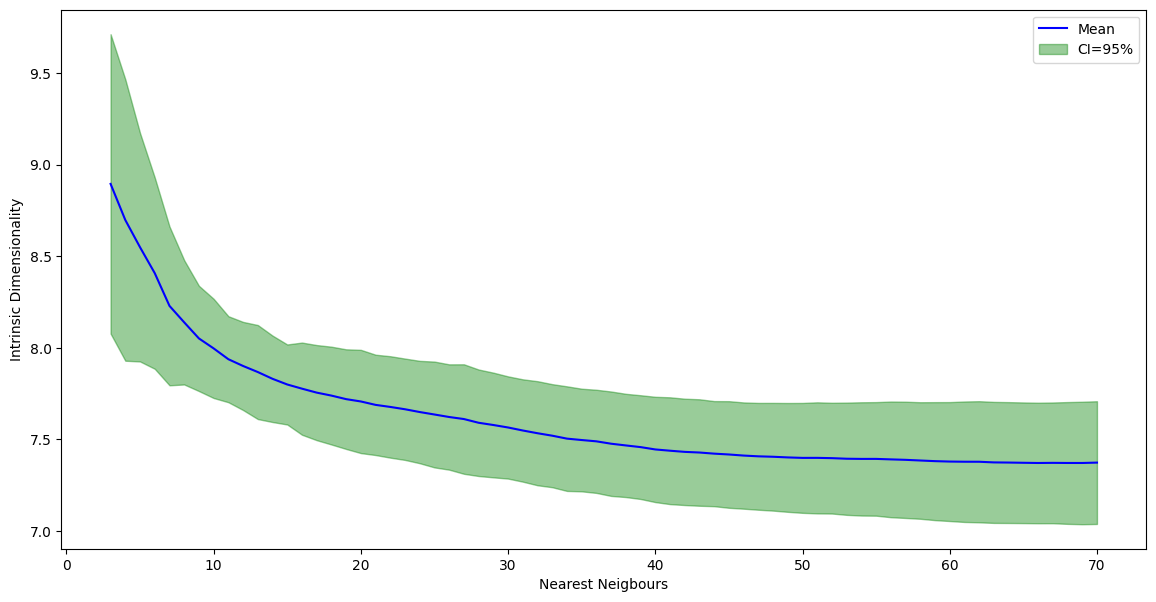

In [14]:
### BEGIN SOLUTION (do not delete this comment!)

# Taking the code from the proposed GitHub.
#Implementation of 'Maximum Likelihood Estimation of Intrinsic Dimension' by Elizaveta Levina and Peter J. Bickel:

from tqdm import tqdm
import pandas as pd
import numpy as np
from sklearn.neighbors import NearestNeighbors

def intrinsic_dim_sample_wise(X, k=5):
    neighb = NearestNeighbors(n_neighbors=k + 1).fit(X)
    dist, ind = neighb.kneighbors(X)
    dist = dist[:, 1:]
    dist = dist[:, 0:k]
    assert dist.shape == (X.shape[0], k)
    assert np.all(dist > 0)
    d = np.log(dist[:, k - 1: k] / dist[:, 0:k-1])
    d = d.sum(axis=1) / (k - 2)
    d = 1. / d
    intdim_sample = d
    return intdim_sample

def intrinsic_dim_scale_interval(X, k1=10, k2=20):
    X = pd.DataFrame(X).drop_duplicates().values # remove duplicates in case you use bootstrapping
    intdim_k = []
    for k in range(k1, k2 + 1):
        m = intrinsic_dim_sample_wise(X, k).mean()
        intdim_k.append(m)
    return intdim_k

def repeated(func, X, nb_iter=100, random_state=None, verbose=0, mode='bootstrap', **func_kw):
    if random_state is None:
        rng = np.random
    else:
        rng = np.random.RandomState(random_state)
    nb_examples = X.shape[0]
    results = []

    iters = range(nb_iter)
    if verbose > 0:
        iters = tqdm(iters)    
    for i in iters:
        if mode == 'bootstrap':
            Xr = X[rng.randint(0, nb_examples, size=nb_examples)]
        elif mode == 'shuffle':
            ind = np.arange(nb_examples)
            rng.shuffle(ind)
            Xr = X[ind]
        elif mode == 'same':
            Xr = X
        else:
            raise ValueError('unknown mode : {}'.format(mode))
        results.append(func(Xr, **func_kw))
    return results
    

# k_1 and k_2 definition:
k1 = 3 # start of interval(included)
k2 = 70 # end of interval(included)

# Dimensionality reduction with bootstrap:
intdim_k_repeated = repeated(intrinsic_dim_scale_interval, 
                             data, 
                             mode='bootstrap', 
                             nb_iter=20, # nb_iter for bootstrapping
                             verbose=1, 
                             k1=k1, k2=k2)

# Transition of the data to the numpy array:
intdim_k_repeated = np.array(intdim_k_repeated)

# Definition of variables for plotting:
x = np.arange(k1, k2+1)
y = np.mean(intdim_k_repeated, axis=0)
y1 = y - 2 * np.std(intdim_k_repeated, axis=0)
y2 = y + 2 * np.std(intdim_k_repeated, axis=0)

# The actual plotting:
plt.figure(figsize=(14, 7))
plt.plot(x, y, color="blue", label='Mean')
plt.fill_between(x=x, y1=y1, y2=y2, alpha=0.4, color="green", label="CI=95%")
plt.xlabel("Nearest Neigbours")
plt.ylabel("Intrinsic Dimensionality")
plt.legend()
plt.show()

### END SOLUTION (do not delete this comment!)

2) Decompose the data on principal components (PCA). Plot the cumulative explained variance by each component. Plot the example of back-decomposition with 6 different set of components and corresponding explained variance. You can choose any digit from the dataset.

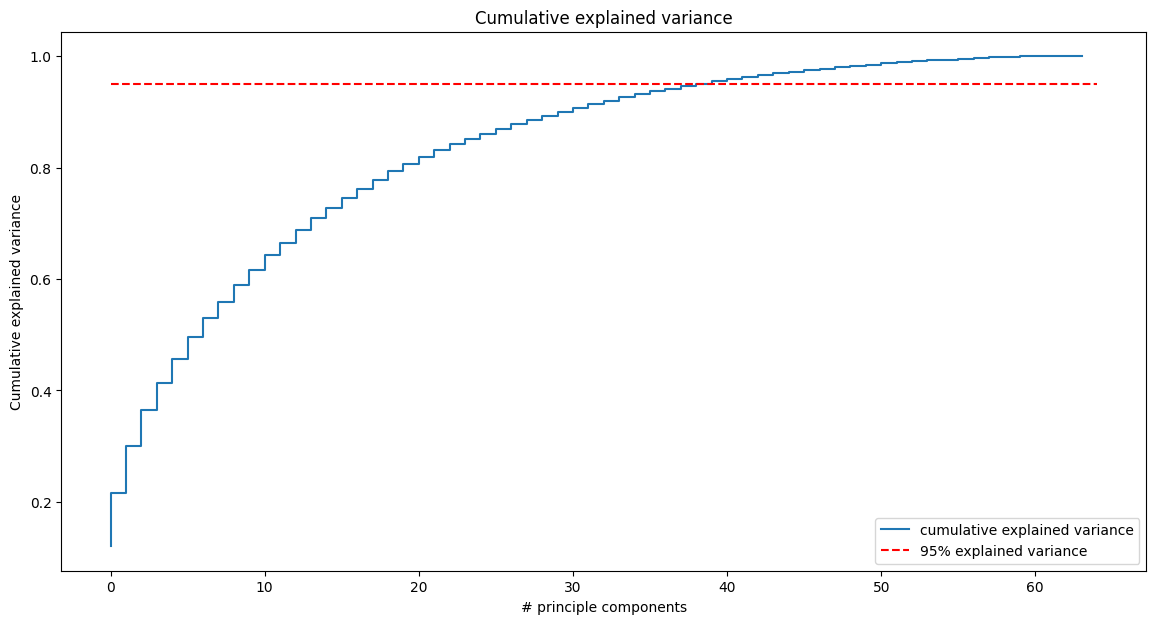

In [15]:
### BEGIN SOLUTION (do not delete this comment!)

# Defining PCA:
preprocess = PCA()

# Fitting the model:
preprocess.fit(data)

# Calculating cumulative explained variance by each component:
cumulative = np.cumsum(preprocess.explained_variance_ratio_)

# Plotting:
plt.figure(figsize=(14, 7))
plt.step(np.arange(0, cumulative.shape[0]), cumulative, label="cumulative explained variance")
plt.plot([0, cumulative.shape[0]], [0.95, 0.95], linestyle="dashed", color="red", label="95% explained variance")
plt.title("Cumulative explained variance")
plt.xlabel("# principle components")
plt.ylabel("Cumulative explained variance")
plt.legend()
plt.show()

### END SOLUTION (do not delete this comment!)

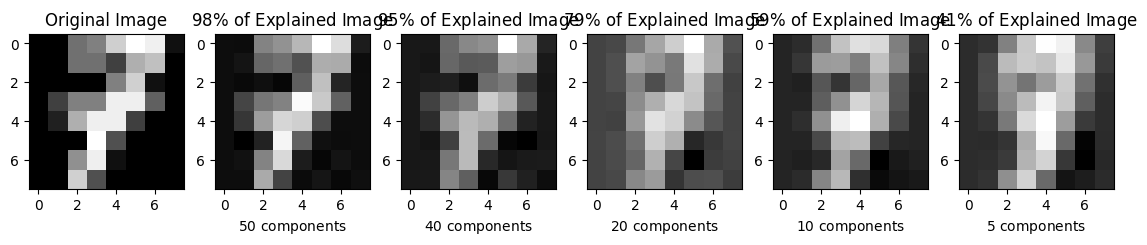

In [16]:
### BEGIN SOLUTION (do not delete this comment!)

# Defining future subplots:
f, ax = plt.subplots(1, 6, figsize=(14, 14))

# Initializing lists for a loop:
components = [None, 50, 40, 20, 10, 5]
percents = [98, 95, 80, 61, 45]

# The loop back-decomposition:
for i, (comp_numb, ax) in enumerate(zip(components, ax.ravel())):

    # Initializing PCA with appropriate number of components:
    preprocess = PCA(n_components=comp_numb)

    # Fitting the model:
    preprocess.fit(data)

    # Transforming the data and assinging to a new variable:
    new_data = preprocess.transform(data)

    # Inverse transformation of the selected number:
    image = preprocess.inverse_transform(new_data)[7]

    # Applying standard scaler to transform the image to the required format:
    image = scaler.inverse_transform(image.reshape(1, -1)).reshape(8, 8)

    # Plotting the image:
    ax.imshow(image, cmap='gray')

    # Design details:
    if i > 0:
        ax.set_title(f"${np.sum(preprocess.explained_variance_ratio_)*100:.0f}$% of Explained Image")
        ax.set_xlabel(f"${comp_numb}$ components")
    else:
        ax.set_title("Original Image")
    
        
plt.rc('font', size=8)
plt.show()

### END SOLUTION (do not delete this comment!)

### Task 2.2. (1 pt.)

Here we will visualize the decomposition in order to observe how data diverges across different manifold learning methods. We are to compare `PCA`, `ICA` and `Isomap` non-linear decompositions [see more over here https://scikit-learn.org/stable/modules/manifold.html], and check the classification accuracy on the new features.

1. Calculate new features on the data with ICA, PCA and Isomap. **Choose the number of components according to your estimation of intrinsic dimension**. Calculate the classification accuracy on these features with `LogisticRegression` on `cross_val=5` with $3$ repeats. Use `RepeatedKFold` and fit the `random_seed = 42`.
2. Show that the `Isomap` gives a statistically significant improvement on the classification accuracy with any appropriate statistical test. Provide corresponding `p-values`. Justify your results, write down 2-3 sentences.


In [17]:
from sklearn.model_selection import RepeatedKFold, RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from scipy import stats
from sklearn.decomposition import PCA, FastICA
from sklearn.manifold import Isomap

1) Calculate new features on the data with ICA, PCA and Isomap. Choose the number of components according to your estimation of intrinsic dimention. Calculate the classification accuracy on these features with LogisticRegression on cross_val=5 with  3  repeats. Use RepeatedKFold and fit the random_seed = 42.

In [18]:
### BEGIN SOLUTION (do not delete this comment!)

# Initializing a list with all required methods. Set the number of components to 8:

# Defining a random seed:
np.random.seed(42)

# Initializing a list of methods of data transformation:
methods = [PCA(n_components=6), FastICA(n_components=6), Isomap(n_components=6)]

# Initializing a classifier:
clf = LogisticRegression(n_jobs=-1)

# Initializing the RepeatedKFold method:
fold = RepeatedKFold(n_splits=5, n_repeats=3, random_state=42)

# Defining a list of models` names:
names = ["PCA", "FastICA", "Isomap"]

# Defining a dictionary for output:
d = {}


for method, name in zip(methods, names):

    # Fitting and transforming the data:
    method.fit(data)
    new_data = method.transform(data)

    # Adding a model`s name to the dictionary:
    d[name] = []
    
    for fold_train, fold_test in fold.split(new_data):

        # Assigning the selected data to the convenient variables:
        X_train, X_test = new_data[fold_train], new_data[fold_test]
        y_train, y_test = dg.target[fold_train], dg.target[fold_test]

        # Fitting the classifier and predicting:
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)

        # Adding a result of the accuracy score to the dictionary:
        d[name].append(accuracy_score(y_test, y_pred))


# Printing the mean results:
for name in names:
    print(f"{name}: {np.mean(d[name])}")

### END SOLUTION (do not delete this comment!)

PCA: 0.8095053131125555
FastICA: 0.8095063447848964
Isomap: 0.9489884452697824


2) Show that the `Isomap` gives statistically significant improvement on the classification accuracy with any appropriate statistical test. Provide corresponding `p-values`.

In [19]:
### BEGIN SOLUTION (do not delete this comment!)

statistics = stats.ttest_ind(d["Isomap"], d["PCA"])[0]
p_value = stats.ttest_ind(d["Isomap"], d["PCA"])[1]

print("T test with alternative hypothesis that Isomap has greater accuracy than PCA")
print(f"Statistic: {statistics:.3f} p_value: {p_value}")

statistics = stats.ttest_ind(d["Isomap"], d["FastICA"])[0]
p_value = stats.ttest_ind(d["Isomap"], d["FastICA"])[1]

print("T test with alternative hypothesis that Isomap has greater accuracy than FastICA")
print(f"Statistic: {statistics:.3f} p_value: {p_value}")

### END SOLUTION (do not delete this comment!)

T test with alternative hypothesis that Isomap has greater accuracy than PCA
Statistic: 19.121 p_value: 1.3148463389131426e-17
T test with alternative hypothesis that Isomap has greater accuracy than FastICA
Statistic: 20.933 p_value: 1.222213486885539e-18


### Task 2.3. (1 pt.)

3) Justify your results, write down 2-3 senteces.

*BEGIN SOLUTION (do not delete this comment!)*

The accuracy score shows that Isomap outperforms the rest of the methods. T-test gives out tiny p-values after comparing means of different methods, which means that we do not accept the null hypothesis about equivalence of either `Isomap` and `PCA` or `Isomap` and `ICA` models. Consequently, Isomap`s outperformance is not a random outcome, but a pattern, confirmed by statistics. 

*END SOLUTION (do not delete this comment!)*

### Task 2.4. kMNIST dimensionality reduction. (2 pts.)

Explore `KMNIST` dataset https://github.com/rois-codh/kmnist. You are to engineer new features (by using any familiar to you method of Manifold Learning) to increase the classification accuracy. Use the `KNN` classifier with any hyperparameters you like.

1. __(2 pt.)__ Get accuracy on `test_set` more than 93%`.

**NOTE** that the data is rather heavy, thus your decomposition will take a while.

__Hint:__ Try to use dimensionality reduction methods, which yield better model performance on `MNIST`. These methods can compete with Autoencoders on `torch`.

1) Get accuracy on test_set more than 93%.

In [20]:
import numpy as np

In [21]:
from sklearn.neighbors import KNeighborsClassifier

def load(f):
    return np.load(f)['arr_0']

# Load the data
x_train = load('kmnist-train-imgs.npz')
x_test = load('kmnist-test-imgs.npz')
y_train = load('kmnist-train-labels.npz')
y_test = load('kmnist-test-labels.npz')

# Reshape the data
x_train = x_train.reshape(-1, 784)
x_test = x_test.reshape(-1, 784)

In [22]:
### BEGIN SOLUTION (do not delete this comment!)

# Setting a seed:
np.random.seed(3)

# Defining the classifier:
clf = KNeighborsClassifier(n_neighbors=4, n_jobs=-1)

# Defining PCA and fitting it: 
preprocess = PCA(n_components=50)
preprocess.fit(x_train)

# Preprocessing data with PCA:
new_x_train = preprocess.transform(x_train)
new_x_test = preprocess.transform(x_test)

# Fitting the model:
clf.fit(new_x_train, y_train)

# Making predictions:
y_pred = clf.predict(new_x_test)

# Calculating the accuracy score:
metric = accuracy_score(y_test, y_pred)
    
print("Test accuracy:", metric)

### END SOLUTION (do not delete this comment!)

Test accuracy: 0.931


## Task 3 - Clustering (2 pts.)

### Task 3.1. Explore KMeans and Gaussian Mixture algorithms (1 pt.)

Try **KMeans, Gaussian Mixture** and **two** more clustering algorithms from sklearn.
To evaluate clustering performance use **two** clustering metrics: *silhouette score*
and *mutual information* or *adjusted mutual information*.

For each algorithm **your task** is to try to find the parameters leading to the best performance for `n_clusters=true_number_of_clusters`:
1. Apply the algorithm with the true number of clusters and try out at least two **other variants** of the number of clusters: a smaller and a larger one than the true number.;
2. For each number of clusters **visualize the clustering result**, calculate the **clustering metrics** and plot them;

__NOTE:__ `sklearn.model_selection.GridSearchCV` does not support clustering methods, thus you suppose to do it manually.

In [23]:
import numpy as np

True number of clusters is 15


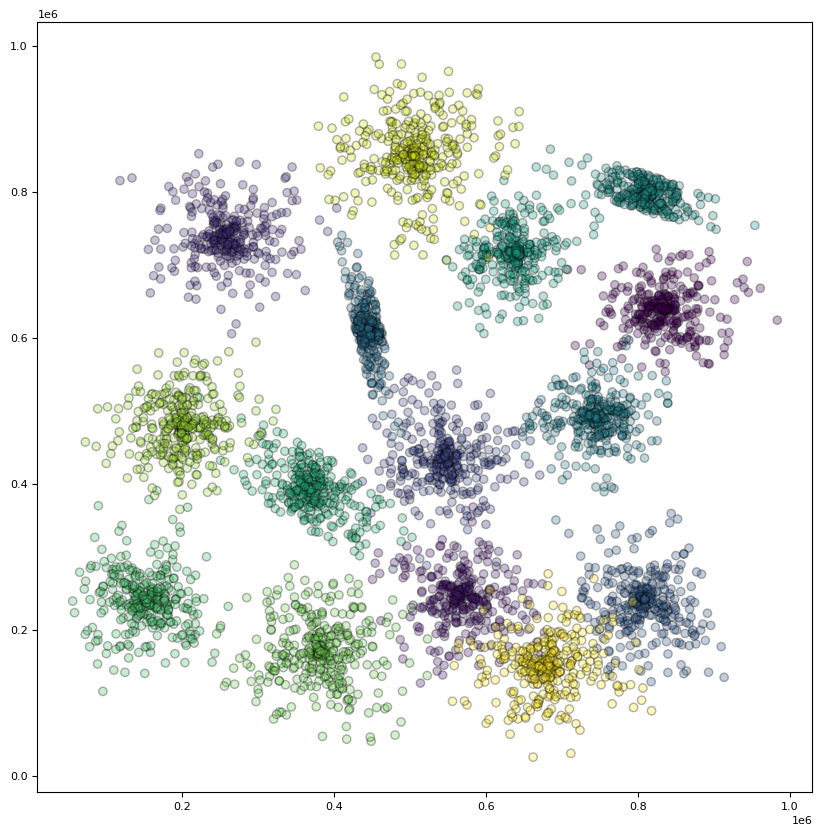

In [24]:
points, labels = np.loadtxt('clustering.txt'), np.loadtxt('clustering_labels.txt')
labels = labels.astype(int)
print("True number of clusters is {}".format(np.max(labels)))
plt.figure(figsize=(10, 10))
plt.scatter(points[:,0], points[:,1], c=labels, alpha=0.3, edgecolor='k')

plt.show()

In [25]:
from sklearn.cluster import KMeans, Birch, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, mutual_info_score
from sklearn.model_selection import GridSearchCV, ParameterGrid
from sklearn.metrics import make_scorer
from sklearn.preprocessing import StandardScaler

1) For each algorithm your task is to try to find the parameters leading to the best performance for n_clusters=true_number_of_clusters

In [26]:
### BEGIN SOLUTION (do not delete this comment!)

import tqdm

# Defining a function:
def computing(clfs, params, points, labels):

    best_params = []
    
    for i in tqdm.tqdm(range(4)):

        # For the KMeans and GaussianMixture models:
        if i < 3:
            gs = GridSearchCV(estimator=clfs[i], param_grid=params[i], scoring="mutual_info_score")
            gs.fit(points, labels)

            y_pred = gs.predict(points)

            best_params.append(gs.best_params_)

        # For the Birch and AgglomerativeClustering models:
        else:

            scores = []
            
            for parameters in ParameterGrid(params[i]):
                
                agg_clf = AgglomerativeClustering(n_clusters=15, **parameters).fit(points)
                y_pred = agg_clf.labels_
                
                silhouette = silhouette_score(labels.reshape(-1, 1), y_pred)
                mutual_info = mutual_info_score(labels, y_pred)
                
                scores.append((parameters, silhouette, mutual_info))

            scores = sorted(scores, key=lambda x: x[2])
            best_params.append(scores[0][0])

    return best_params
        
# Defining a seed:
np.random.seed(15)

# Initializing all required classifiers:
clfs = [KMeans(n_clusters=15, random_state=15), GaussianMixture(n_components=15, random_state=15), Birch(n_clusters=15), AgglomerativeClustering(n_clusters=15)]

# Defining parameters for the models respectively:

# {"init": ["k-means++", "random"]},
params = [{"algorithm": ["lloyd", "elkan"], "init": ["k-means++", "random"], "max_iter": [250, 300, 350]}, {"covariance_type": ["full", "tied", "diag", "spherical"], "max_iter": [85, 100, 115]}, 
          {"threshold": [0.4, 0.5, 0.58], "branching_factor": [25, 50, 55]}, {"metric": ["euclidean", "l1", "l2", "manhattan"], "linkage": ["complete", "average"]}]


best_params = computing(clfs, params, points, labels)

### END SOLUTION (do not delete this comment!)

100%|████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:32<00:00,  8.11s/it]


2) Apply the algorithm with the true number of clusters and try out at least two other variants of the number of clusters: a smaller and a larger one than the true number.;

 Do not forget that despite the plot picturing just the KMeans and GuassianMizture, you will need to ADDITIONALLY try put and plot two other clustering methods.

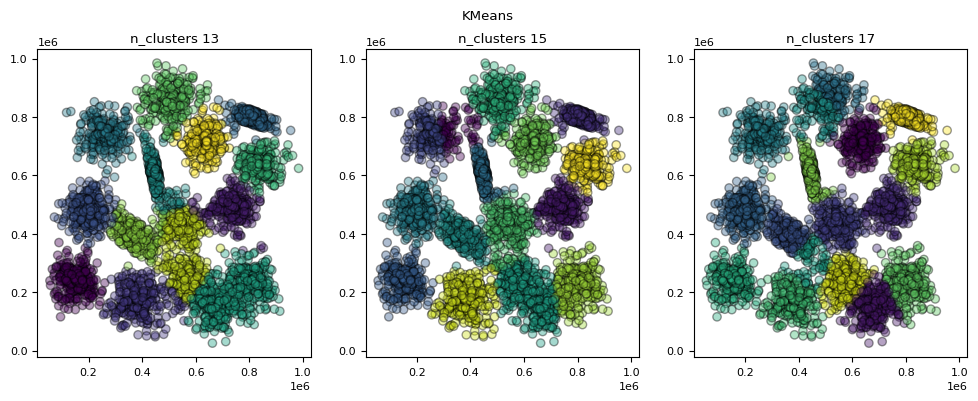

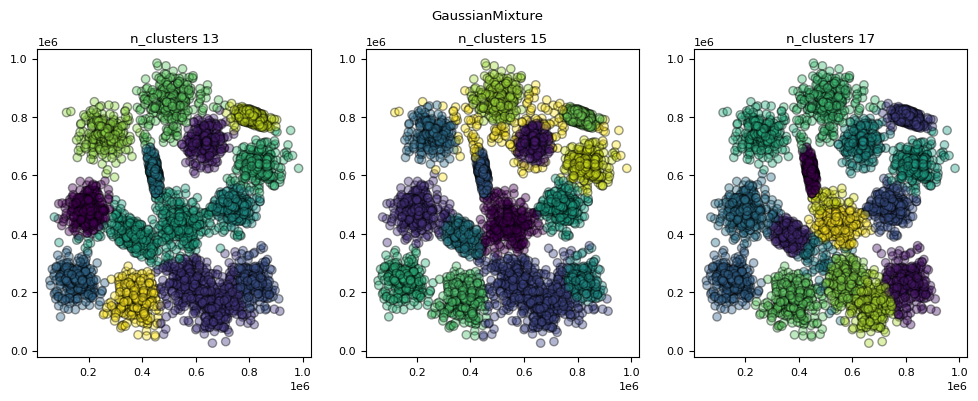

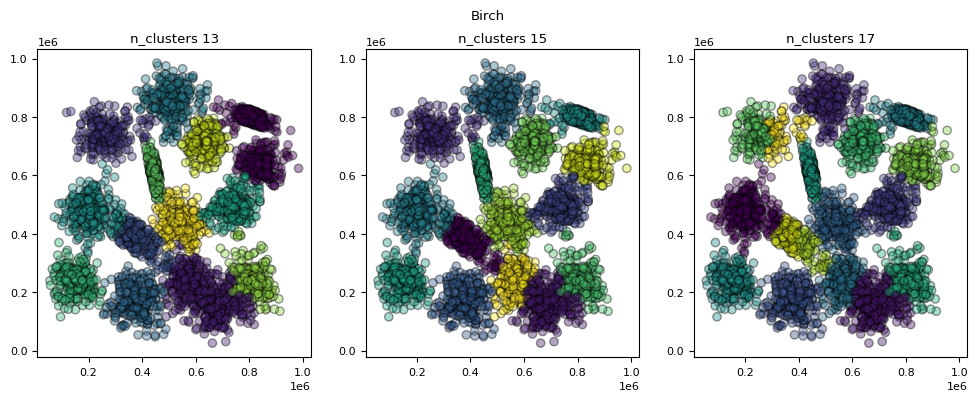

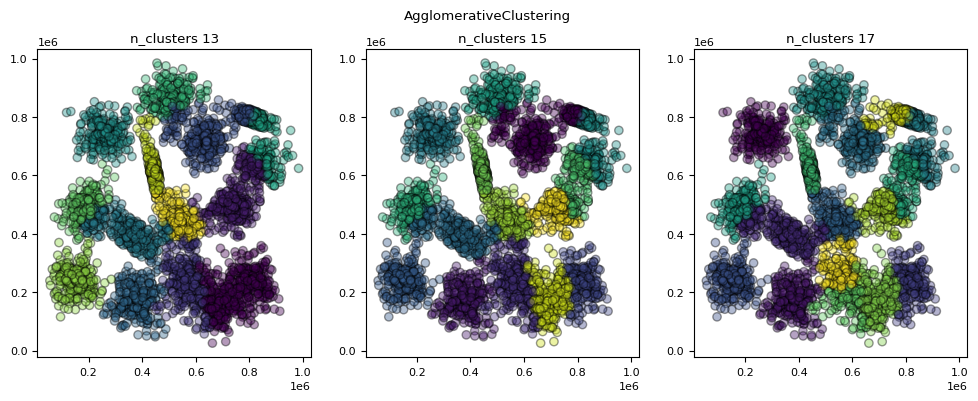

In [27]:
### BEGIN SOLUTION (do not delete this comment!)

clusters_number = [13, 15, 17]

for i, clt in enumerate(clfs):
    
    _, axes = plt.subplots(figsize=(12, 4), ncols=3)

    plt.suptitle(type(clt).__name__)

    for n_clusters, ax in zip(clusters_number, axes.ravel()):

        if i == 2:
            preds = clt.__class__(**best_params[i], n_clusters=n_clusters).fit_predict(points) 

        else:
            preds = clt.__class__(n_clusters, **best_params[i]).fit_predict(points)        
    
        ax.scatter(points[:,0], points[:,1], c=preds, alpha=0.4, edgecolor="k")
        ax.set_title(f"n_clusters {n_clusters}")

plt.show() 

### END SOLUTION (do not delete this comment!)

2) For each number of clusters vizualize the clustering result, calculate the clustering metrics and plot them;


4it [00:28,  7.10s/it]


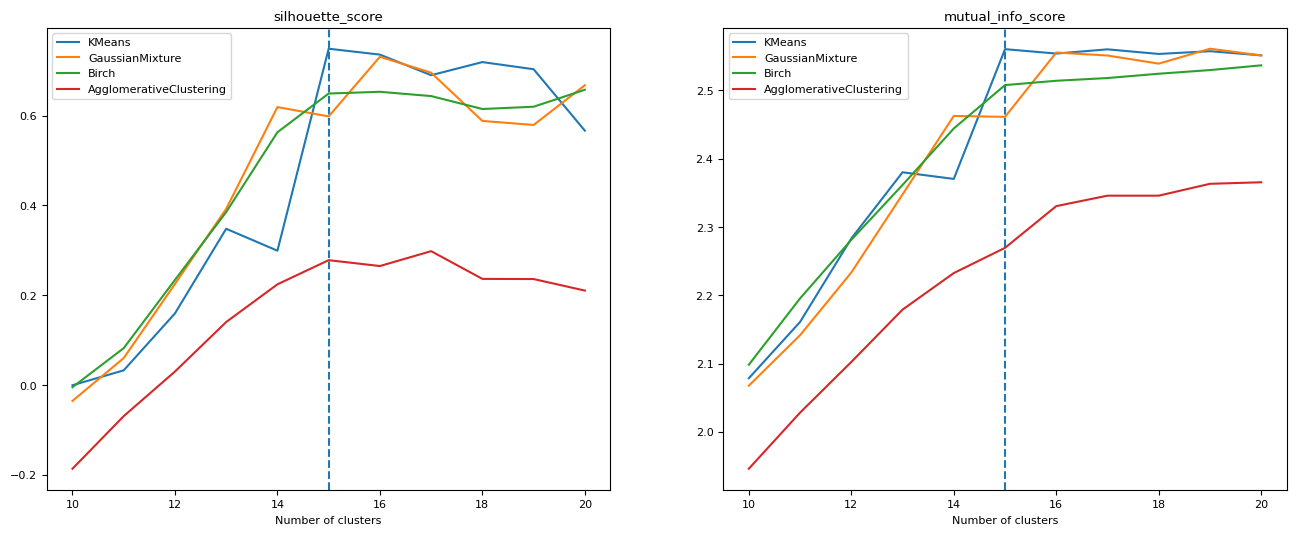

In [28]:
### BEGIN SOLUTION (do not delete this comment!)

clusters_arange = np.arange(10, 20+1)

_, axes = plt.subplots(1, 2, figsize=(16, 6))


axes_names = ["silhouette_score", "mutual_info_score"]

for i, ax_name in enumerate(axes_names):
    axes[i].set_title(ax_name)
    axes[i].set_xlabel("Number of clusters")
    axes[i].axvline(x=15, ymin=0, ymax=1, ls="--")

for i, clt in tqdm.tqdm(enumerate(clfs)):

    silhouette_scores = []
    mutual_info_scores = []

    for n_clusters in clusters_arange:

        if i == 2:
            preds = clt.__class__(**best_params[i], n_clusters=n_clusters).fit_predict(points)

        else:
            preds = clt.__class__(n_clusters, **best_params[i]).fit_predict(points)        

        silhouette_scores.append(silhouette_score(labels.reshape(-1, 1), preds))
        mutual_info_scores.append(mutual_info_score(labels, preds))

    axes[0].plot(clusters_arange, silhouette_scores, label=type(clt).__name__)
    axes[1].plot(clusters_arange, mutual_info_scores, label=type(clt).__name__)

[axes[i].legend() for i, _ in enumerate(axes_names)] 

plt.show()

### END SOLUTION (do not delete this comment!)

### Task 3.2. Finding the Number of Clusters with Bootstrap. (1 pt.)
For a chosen algorithm find the best number of clusters using bootstrap. Based on your observations made at the previous task, choose one algorithm assuming **you do not have true labels and do not know the true number of clusters**.
1. Estimate variance of the clustering metric of your choice (i.e. *silhouette score*/*mutual information*/*adjusted mutual information*)and construct normal 95% **confidence interval (CI)**;
2. **Plot the metric** with the corresponding confidence intervals and show the best number of clusters.

__Hints:__
- you can choose bootstrap samples with any size, and sample number starting from `50`;
- you can use `scipy.stats.norm.interval()` to derive CI;

1) Estimate variance of the clustering metric of your choice (i.e. silhouette score/mutual information/adjusted mutual information)and construct normal 95% confidence interval (CI);

In [29]:
### BEGIN SOLUTION (do not delete this comment!)

bootstrap_samples = 50
samples_number = 1000

left_tails = []
right_tails = []

scores = []

for cluster_number in range(10, 21):

    statistics = []

    for i in range(bootstrap_samples):
        
        indices = np.random.choice(points.shape[0], samples_number)

        x = points[indices]
        y = labels[indices]
        
        clf = GaussianMixture(n_components=cluster_number, **best_params[1])
        clf.fit(x)
        y_pred = clf.predict(x)

        statistics.append(silhouette_score(y.reshape(-1, 1), y_pred))

    conf_inter = stats.norm.interval(0.95, np.mean(statistics), np.std(statistics))

    scores.append(np.mean(statistics))
    left_tails.append(conf_inter[0])
    right_tails.append(conf_inter[1])

    print("Number of clusters:", cluster_number)
    print("\tVariance:", np.var(statistics))
    print("\tConfidence interval:", f"({conf_inter[0]}, {conf_inter[1]})\n")    

### END SOLUTION (do not delete this comment!)

Number of clusters: 10
	Variance: 0.005707831877929028
	Confidence interval: (-0.12375252764368475, 0.172398792559414)

Number of clusters: 11
	Variance: 0.003735110345357253
	Confidence interval: (0.012401823196259806, 0.2519703735732949)

Number of clusters: 12
	Variance: 0.0029694680815179125
	Confidence interval: (0.15684213835906657, 0.37045009096867)

Number of clusters: 13
	Variance: 0.004024997533959155
	Confidence interval: (0.2984450177826065, 0.5471364915415555)

Number of clusters: 14
	Variance: 0.006323955971275926
	Confidence interval: (0.4074138662392018, 0.7191394920548488)

Number of clusters: 15
	Variance: 0.014145923572082622
	Confidence interval: (0.38263040663562714, 0.8488534557562888)

Number of clusters: 16
	Variance: 0.00964057383546696
	Confidence interval: (0.4670888469571763, 0.8519725561307787)

Number of clusters: 17
	Variance: 0.0056443994102874885
	Confidence interval: (0.5010513923619272, 0.7955525156342814)

Number of clusters: 18
	Variance: 0.00764703

2) Plot the metric with the corresponding confidence intervals and show the best number of clusters.

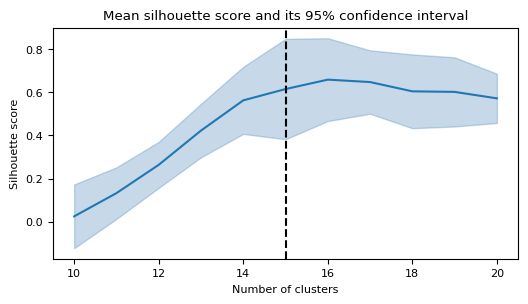

In [30]:
### BEGIN SOLUTION (do not delete this comment!)

plt.figure(figsize=(6, 3))

plt.plot(np.arange(10, 21), scores)

plt.fill_between(np.arange(10, 21), left_tails, right_tails, alpha=0.3, color="steelblue")

plt.axvline(x=15, ymin=0, ymax=1, ls="--", c="black")

plt.title("Mean silhouette score and its 95% confidence interval")
plt.ylabel("Silhouette score")
plt.xlabel("Number of clusters")
plt.rc("font", size=8)

plt.show()

### END SOLUTION (do not delete this comment!)

## Task 4. Practice with Different Anomaly Detection Algorithms. (2 pts)

### Task 4.1 (1 pt)

- Here we will use __fraud_dataset__ (creditcard.csv )
- Compute the __contamination__ (or impurity) on the **test** set as the ratio of anomaly objects to all the objects.  
- Predict the anomaly with any **three** Anomaly detection methods among ones from: https://scikit-learn.org/stable/modules/outlier_detection.html, note, we do not use true labels to fit anomaly detectors.
- Explore, how the `roc_auc_score` for anomaly detectors changes with `contamination` value, taking a grid `[0.1*contamination, 1*contamination, 10*contamination]`. Point out the best performing algorithm.

In [31]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, precision_score

data = pd.read_csv('creditcard.csv')

X = data.drop(columns="Class")
y = data["Class"]

# keep the split fixed
tt_split = train_test_split(X, y, test_size = 0.1, stratify=y, random_state= 42)
train_X, test_X, train_y, test_y = tt_split

# delete the targets for training
train_y = 0

In [32]:
### BEGIN SOLUTION (do not delete this comment!)

# impurity estimation on test data

contamination = np.mean(test_y)

### END SOLUTION (do not delete this comment!)

In [33]:
### BEGIN SOLUTION (do not delete this comment!)

from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM
from sklearn.neighbors import LocalOutlierFactor

np.random.seed(37)

# Choose three anomaly detection models
models = [IsolationForest(n_jobs=-1), OneClassSVM(), LocalOutlierFactor(n_jobs=-1, novelty=True)]
model_names = ["IsolationForest", "OneClassSVM", "LocalOutlierFactor"]

for i in [0.1, 1, 10]:
    # >>> your solution here <<<
    
    curr_contamination = contamination * i
    
    for j, model in enumerate(models):
        
        if j == 1:
            params = {"nu": curr_contamination}
        else:
            params = {"contamination": curr_contamination}
            
        model.set_params(**params)
        model.fit(train_X.values)
        y_pred = model.predict(test_X.values)

        y_pred = [x+2 if x==-1 else x-1 for x in y_pred]
        
        roc_auc = roc_auc_score(test_y, y_pred)
        precision = precision_score(test_y, y_pred, average="weighted")

        print(f"{model_names[j]}: Contamination: {curr_contamination:.3f} ROC/AUC: {roc_auc:.3f} Precision: {precision:.3f}")
        
### END SOLUTION (do not delete this comment!)

IsolationForest: Contamination: 0.002 ROC/AUC: 0.510 Precision: 0.984
OneClassSVM: Contamination: 0.002 ROC/AUC: 0.499 Precision: 0.966
LocalOutlierFactor: Contamination: 0.002 ROC/AUC: 0.499 Precision: 0.966
IsolationForest: Contamination: 0.017 ROC/AUC: 0.773 Precision: 0.986
OneClassSVM: Contamination: 0.017 ROC/AUC: 0.489 Precision: 0.966
LocalOutlierFactor: Contamination: 0.017 ROC/AUC: 0.500 Precision: 0.967
IsolationForest: Contamination: 0.169 ROC/AUC: 0.851 Precision: 0.982
OneClassSVM: Contamination: 0.169 ROC/AUC: 0.510 Precision: 0.967
LocalOutlierFactor: Contamination: 0.169 ROC/AUC: 0.506 Precision: 0.967


### Task 4.2 (1 pt)

The idea is to see when anomaly detection methods, trained with no labels, can facilitate the prediction of the classifier. Imagine a real case scenario: you have labelled only a small portion of the dataset and a bunch of unlabeled data. We will simulate the situation when __90%__ of data is unlabeled and we still desire to achieve good performance.


As you can score your predictions only on the __10%__ of the sample, you better do it in cross validation to ensure the model stability.
1. Take your favorite classifier and estimate the performance on __test set__ using `StratifiedKFold(n_splits=10, random_state = 42)` with `roc_auc` and `precision_score`. You can use test set upsampling and other instruments to enforce your prediction.

> Do not get confused, here we swap __train__ and __test__ and use __test__ as if it's the only data we have on our hands.

2. Try to enhance the classifier performance in  `roc_auc` or `precision_score` (or ideally both), building the ensemble, using __Anomaly detection__ methods from the previous task. You can fit __Anomaly detection__ methods on both  __training set__ and subset from __test set__ on the cross-validation fold.

__NOTE:__ try not to overfit, thus not adjust the `contamination` while training, and refit classifiers on each fold.

__Hints:__ `sklearn.ensemble.VotingClassifier` does not support Anomaly detection methods, so you are to write it yourself. And `np.logical_and` or `np.logical_or` will suit for the trivial ensemble.

In [42]:
### BEGIN SOLUTION (do not delete this comment!)

# choose your favorite classifier, e.g. from sklearn.linear_model import LogisticRegression

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

np.random.seed(89)

skf = StratifiedKFold(n_splits=10, random_state = 42, shuffle=True)
skf.get_n_splits(test_X, test_y)

roc_auc_scores = []
pr_scores = []

clf = DecisionTreeClassifier(max_depth=2)

for train_index, test_index in skf.split(test_X, test_y):
    # >>> your solution here <<<
    X_train, X_test = test_X.iloc[train_index], test_X.iloc[test_index]
    y_train, y_test = test_y.iloc[train_index], test_y.iloc[test_index]

    clf.fit(X_train, y_train)
    y_pred_clf = clf.predict(X_test)

    roc_auc_scores.append(roc_auc_score(y_test, y_pred_clf))
    pr_scores.append(precision_score(y_test, y_pred_clf, average='weighted'))
    
print(f"ROC/AUC mean: {np.mean(roc_auc_scores)} std: {np.std(roc_auc_scores)}")
print(f"Precision mean: {np.mean(pr_scores)} std: {np.std(pr_scores)}")

### END SOLUTION (do not delete this comment!)

ROC/AUC mean: 0.8592976278724981 std: 0.07987648913097738
Precision mean: 0.9938733588253277 std: 0.003432294782107609


Try to enhance the classifier performance using Anomaly detection methods

In [46]:
### BEGIN SOLUTION (do not delete this comment!)

skf = StratifiedKFold(n_splits=10, random_state = 42, shuffle=True)
skf.get_n_splits(test_X, test_y)

roc_auc_scores = []
pr_score = []

clf = DecisionTreeClassifier(max_depth=2)
outlier_model = LocalOutlierFactor(n_jobs=-1, novelty=True)

for train_index, test_index in skf.split(test_X, test_y):
    # >>> your solution here <<<
    X_train, X_test = test_X.iloc[train_index], test_X.iloc[test_index]
    y_train, y_test = test_y.iloc[train_index], test_y.iloc[test_index]

    outlier_model.fit(X_train.values)
    y_pred_outlier = outlier_model.predict(X_test.values)

    y_pred_outlier = [x+2 if x==-1 else x-1 for x in y_pred_outlier]

    clf.fit(X_train, y_train)
    y_pred_clf = clf.predict(X_test)

    new_y_pred = np.logical_or(y_pred_outlier, y_pred_clf)

    roc_auc_scores.append(roc_auc_score(y_test, new_y_pred))
    pr_scores.append(precision_score(y_test, new_y_pred, average='weighted'))
    
print(f"ROC/AUC mean: {np.mean(roc_auc_scores)} std: {np.std(roc_auc_scores)}")
print(f"Precision mean: {np.mean(pr_scores)} std: {np.std(pr_scores)}")

### END SOLUTION (do not delete this comment!)

ROC/AUC mean: 0.8706844576229307 std: 0.058545377510513454
Precision mean: 0.9878769023508476 std: 0.004682185038258485


Write 1-2 sentences on your findings.

*BEGIN SOLUTION (do not delete this comment!)*

By and large, the `precision` score get a little bit worse after applying an anomaly detection method. `ROC/AUC` metric gets better (Except of `OneClassSVM` model. It only harms the `ROC/AUC` metric).

*END SOLUTION (do not delete this comment!)*